# VAX

Vaccinations in the World.

> Max Pierini

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
sns.set()

from IPython.display import display, Markdown

In [2]:
df = pd.read_csv(
    'https://github.com/owid/covid-19-data/raw/master/public/data/vaccinations/vaccinations.csv',
    parse_dates=['date']
)

In [3]:
www = df[df.location=='World'].set_index('date')

In [4]:
latest_www = www.iloc[-1]

In [5]:
Markdown(fr"""
Latest update: {latest_www.name}

Total vaccinations in the world: {latest_www.total_vaccinations:,.0f}

Average vaccinations per day: {latest_www.total_vaccinations / www.resample('D').mean().index.size:,.0f} per day

Percentage of vaccinated in the world: {latest_www.total_vaccinations_per_hundred:,.2f}\%
""")


Latest update: 2021-01-05 00:00:00

Total vaccinations in the world: 14,556,552

Average vaccinations per day: 632,894 per day

Percentage of vaccinated in the world: 0.19\%


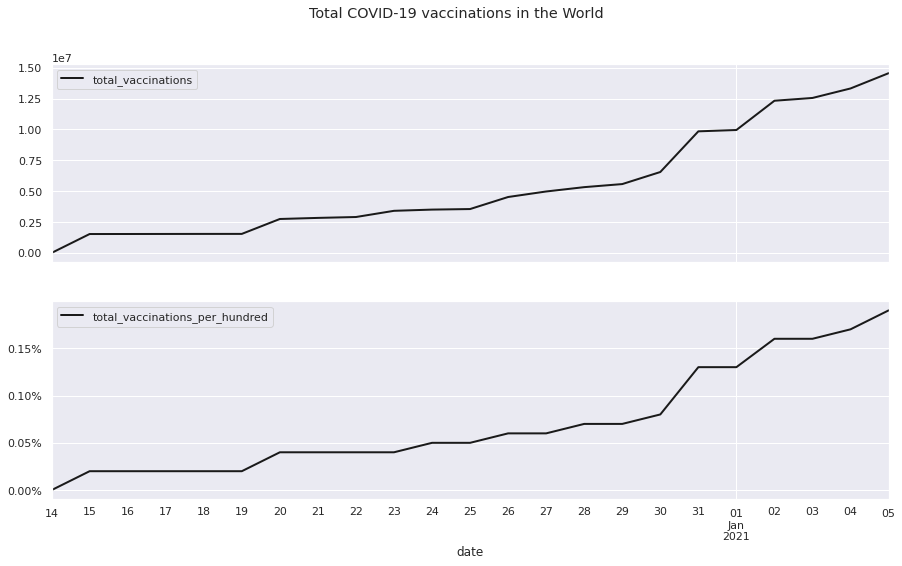

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(15, 8), sharex=True)
for i, col in enumerate(['total_vaccinations', 'total_vaccinations_per_hundred']):
    www.plot(y=col, ax=ax.flat[i], lw=2, color='k')
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(100, 2))
fig.suptitle('Total COVID-19 vaccinations in the World')
plt.show()

In [7]:
latest = df.groupby('location')[['date', 'total_vaccinations']].max()

In [8]:
latest = latest[latest.index!='World']

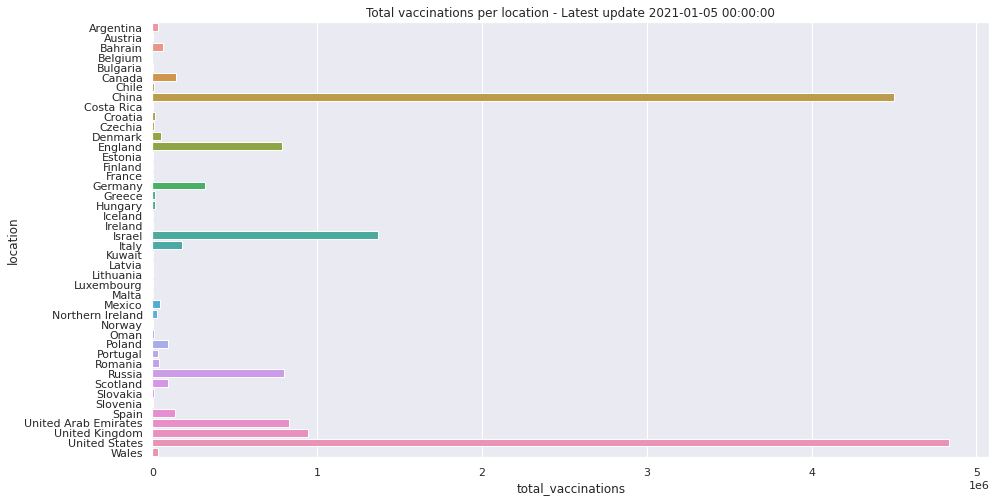

In [9]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(
    data=latest,
    y=latest.index, x='total_vaccinations',
    ax=ax
)
ax.set(
    title="Total vaccinations per location - "
    fr'Latest update {www.index.max()}'
)
plt.show()

In [10]:
latest_pct = df.groupby('location')[['date', 'total_vaccinations_per_hundred']].max()

In [11]:
latest_pct = latest_pct[latest_pct.index!='World']

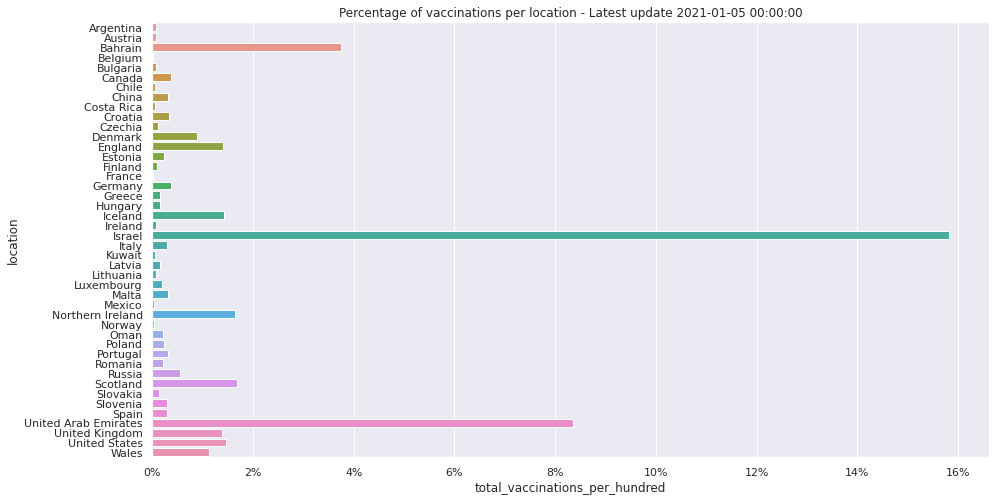

In [12]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(
    data=latest_pct,
    y=latest_pct.index, x='total_vaccinations_per_hundred',
    ax=ax
)
ax.set(
    title="Percentage of vaccinations per location - "
    fr'Latest update {www.index.max()}'
)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(100, 0))
plt.show();

# Argentina

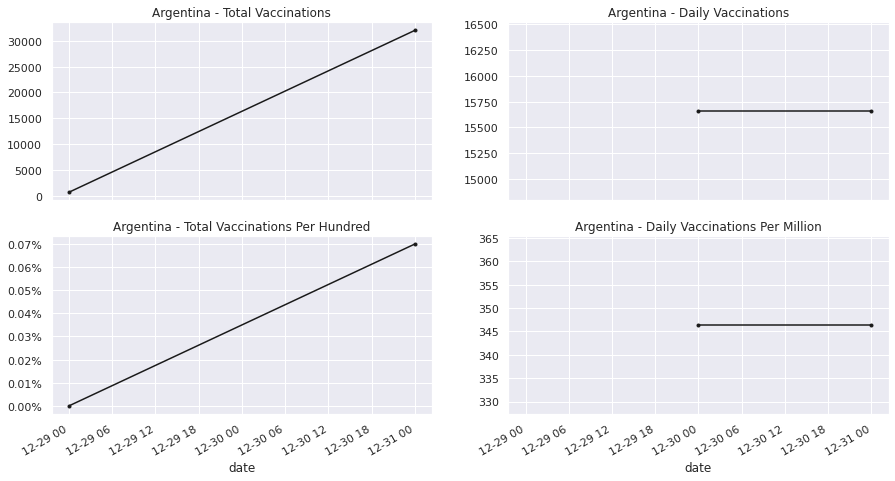

# Austria

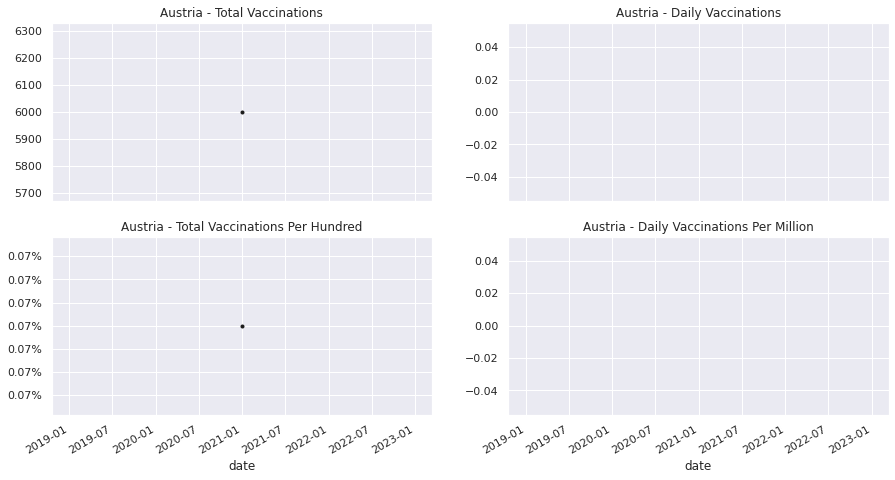

# Bahrain

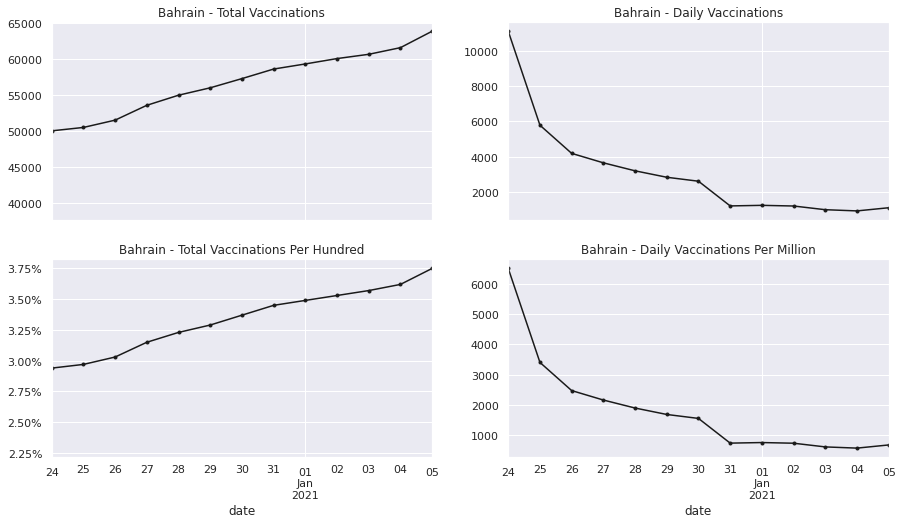

# Belgium

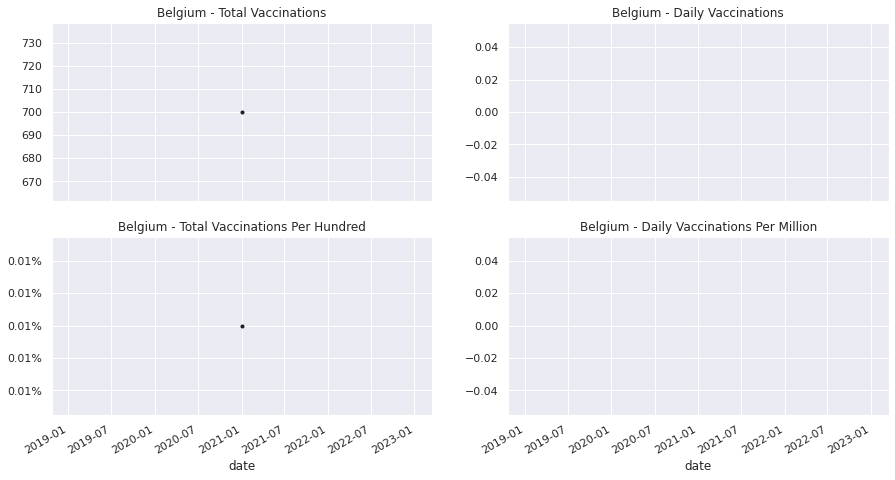

# Bulgaria

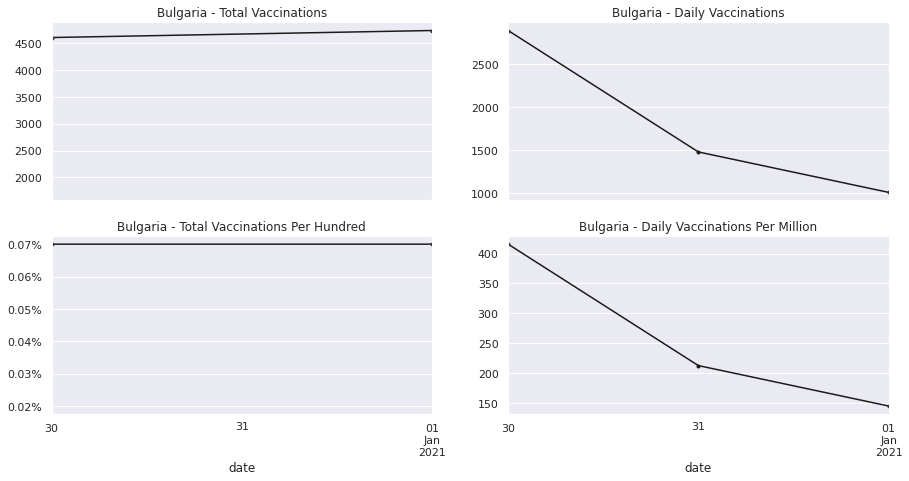

# Canada

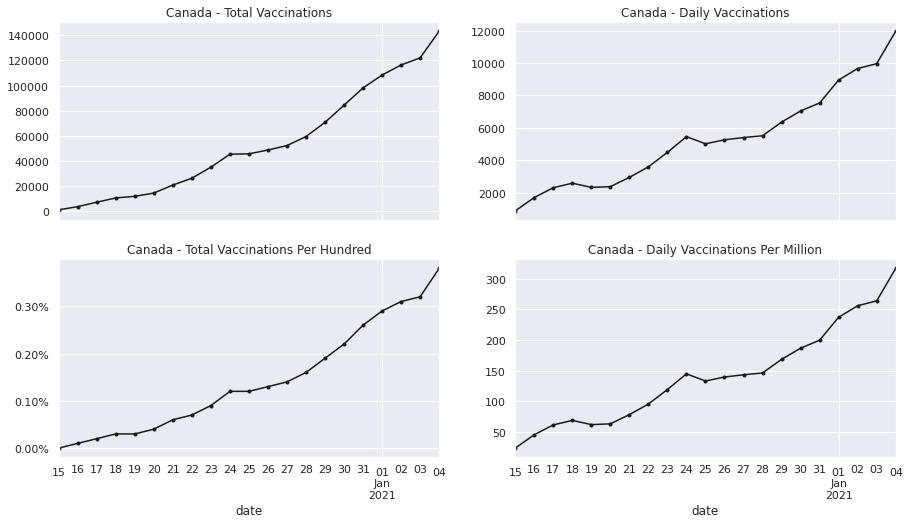

# Chile

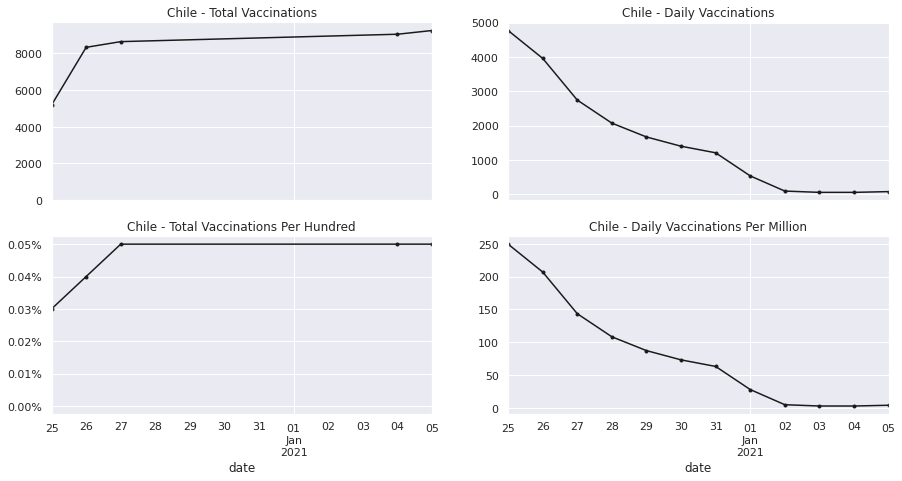

# China

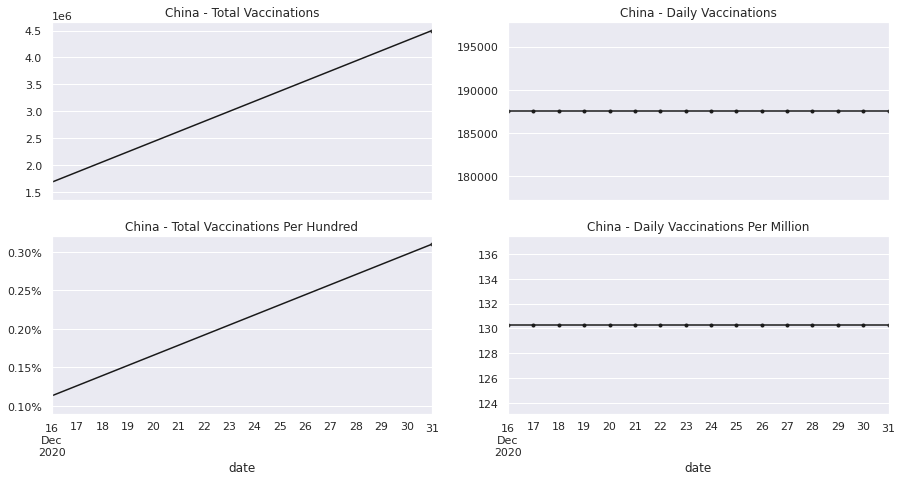

# Costa Rica

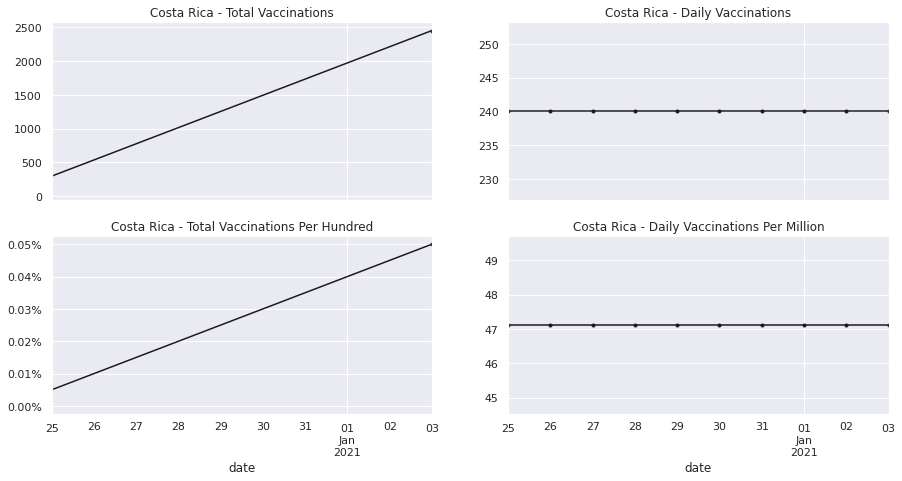

# Croatia

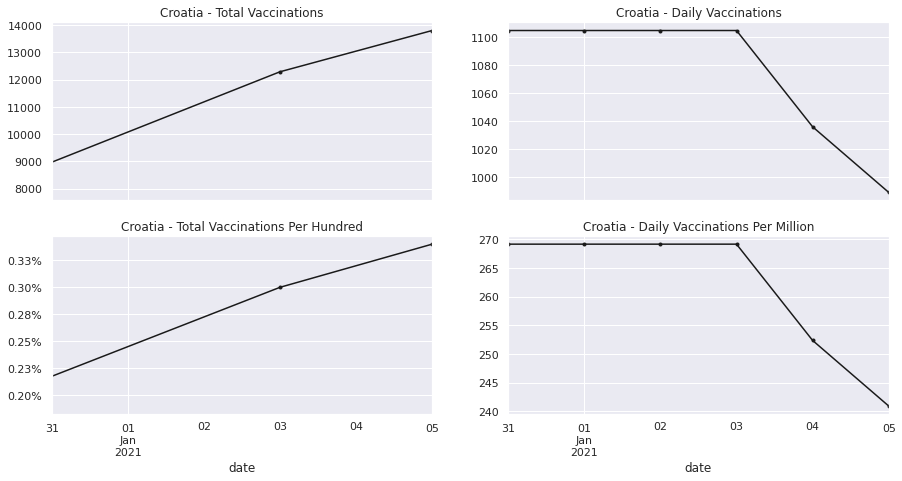

# Czechia

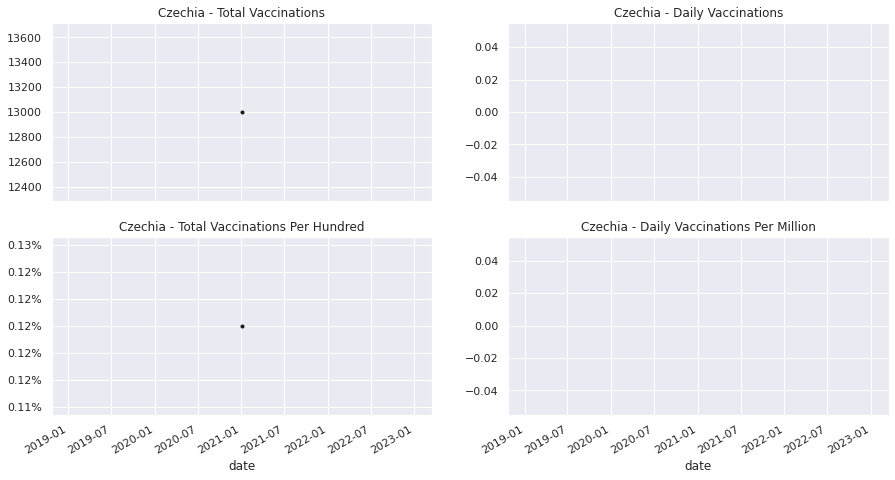

# Denmark

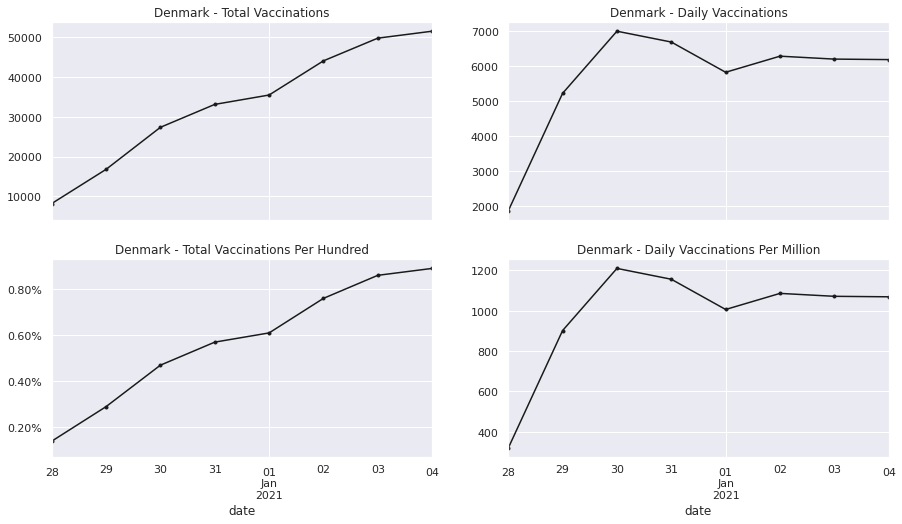

# England

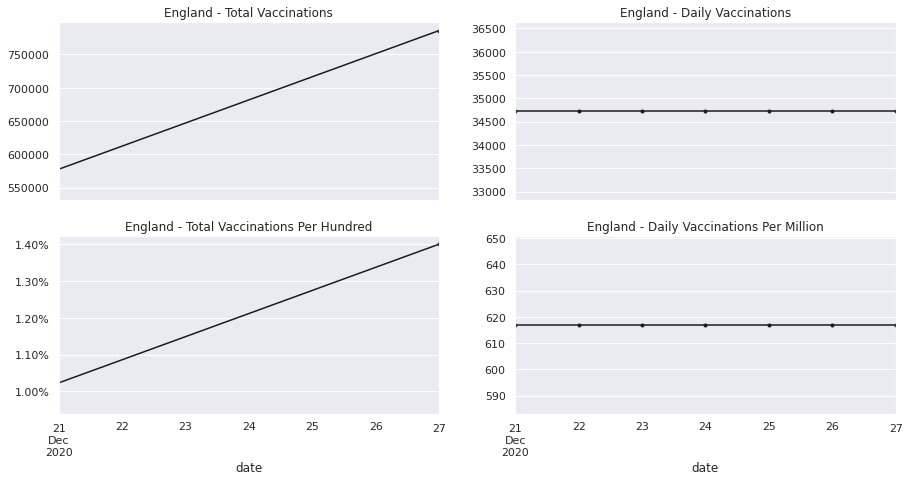

# Estonia

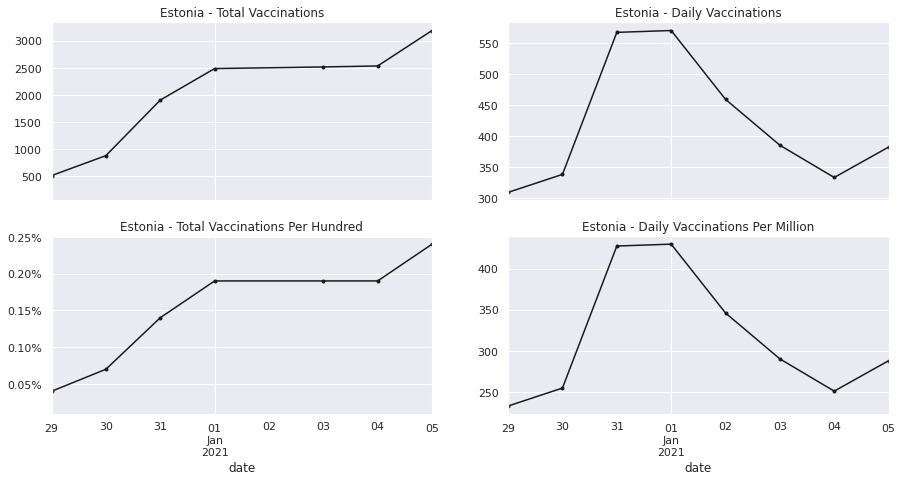

# Finland

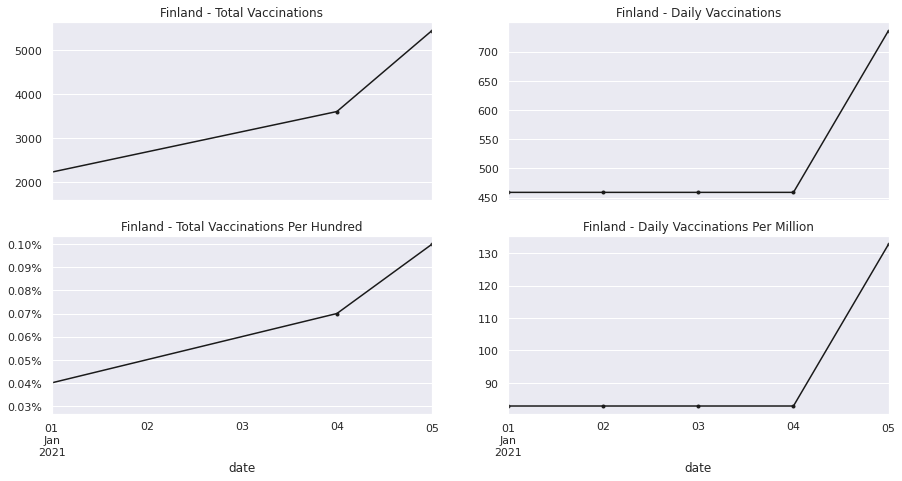

# France

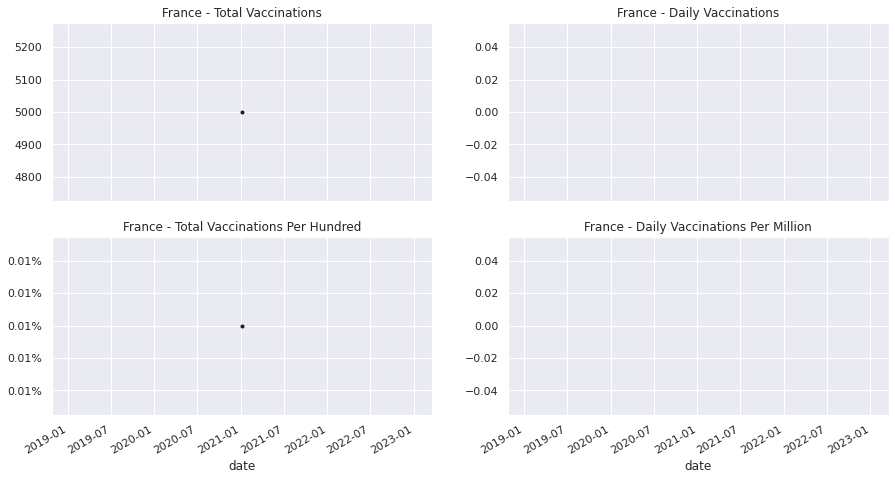

# Germany

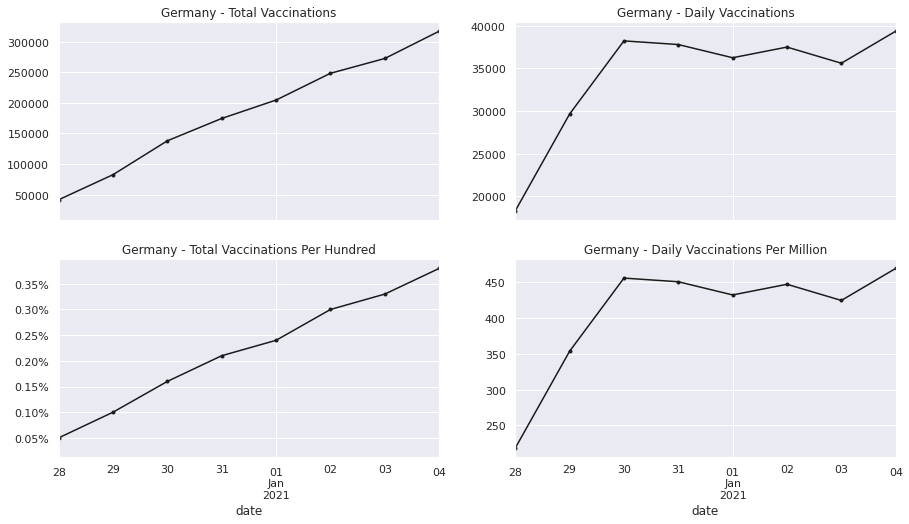

# Greece

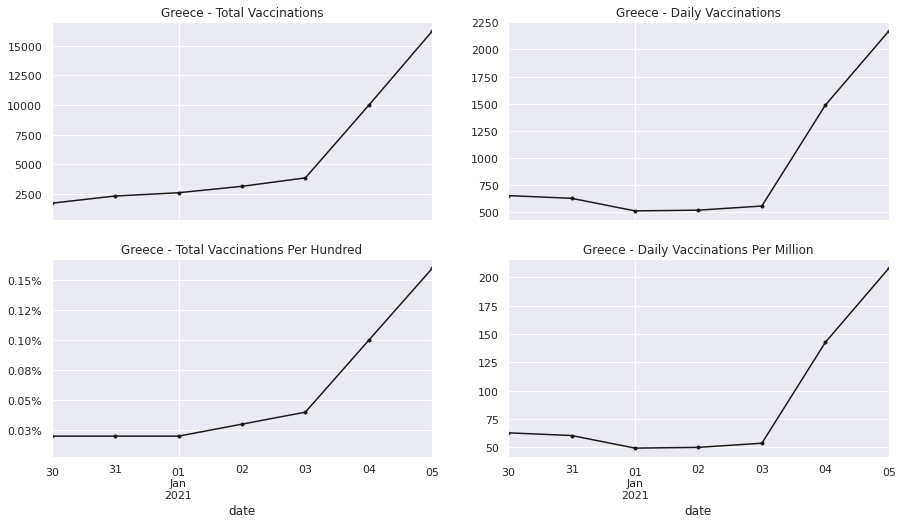

# Hungary

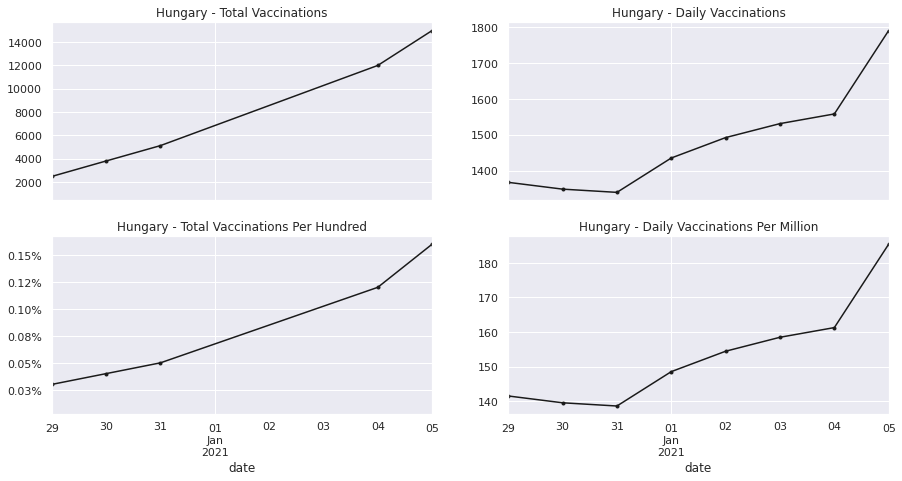

# Iceland

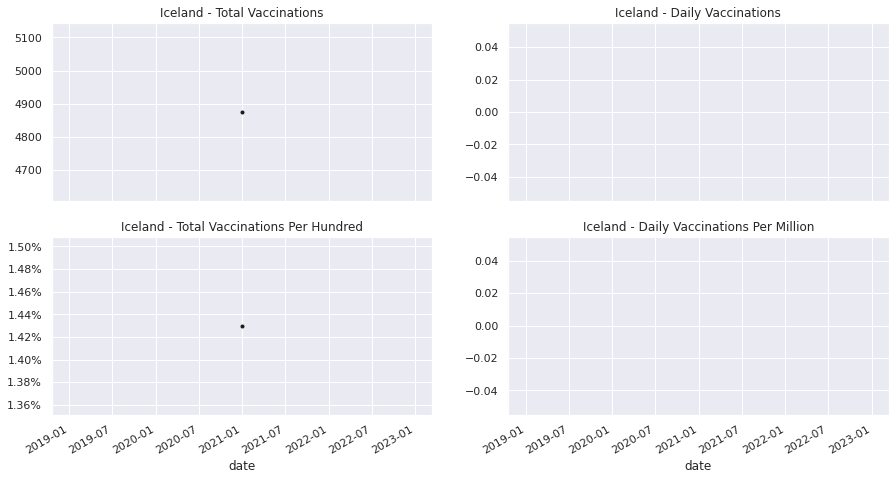

# Ireland

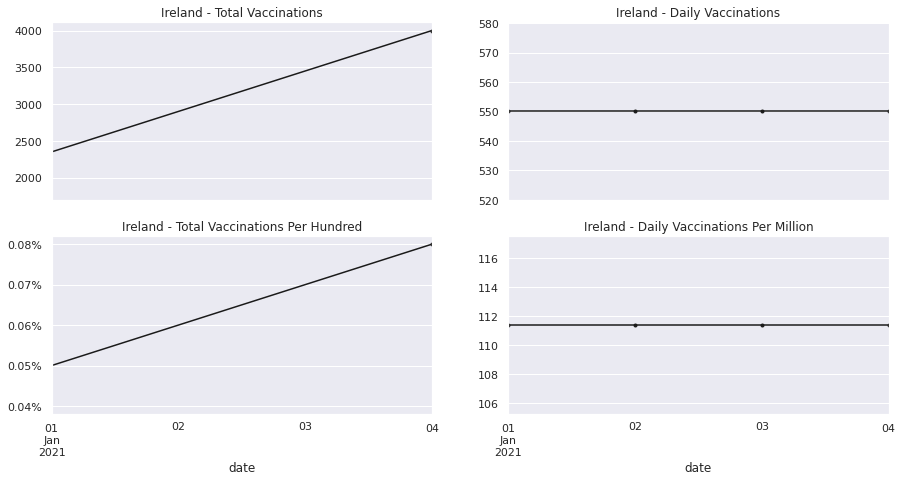

# Israel

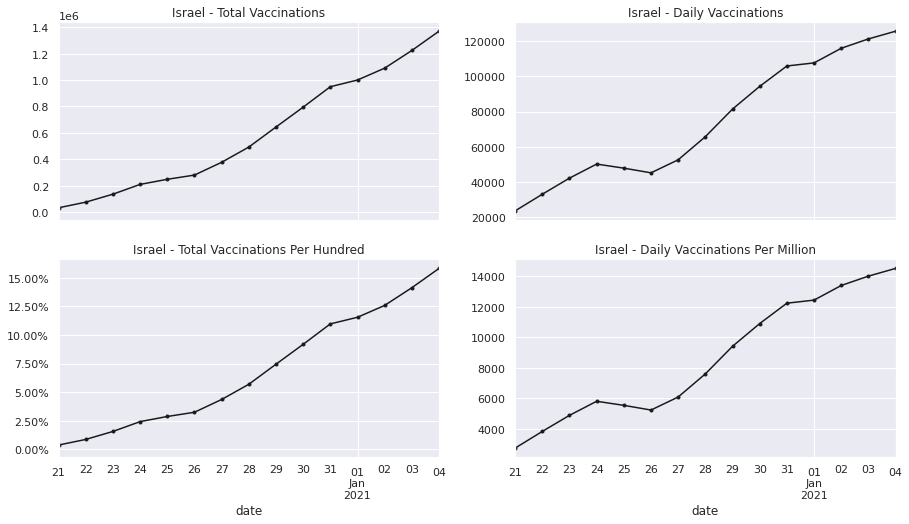

# Italy

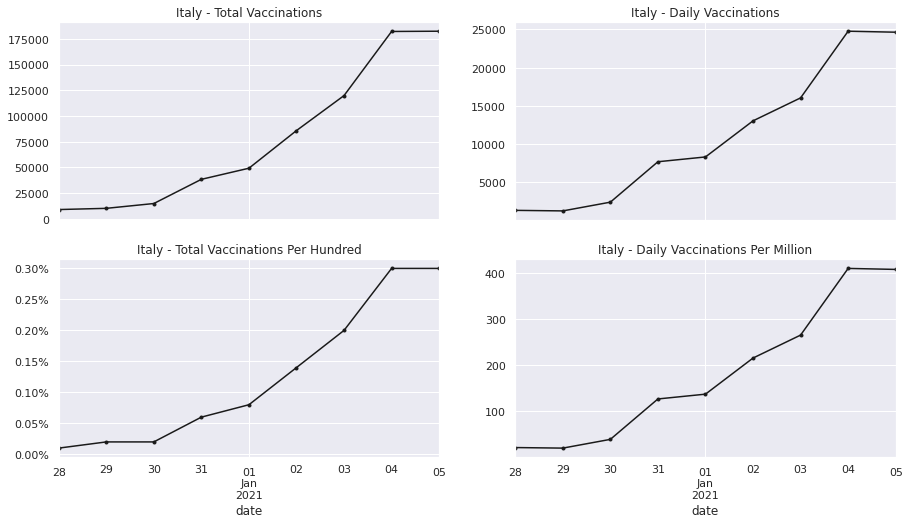

# Kuwait

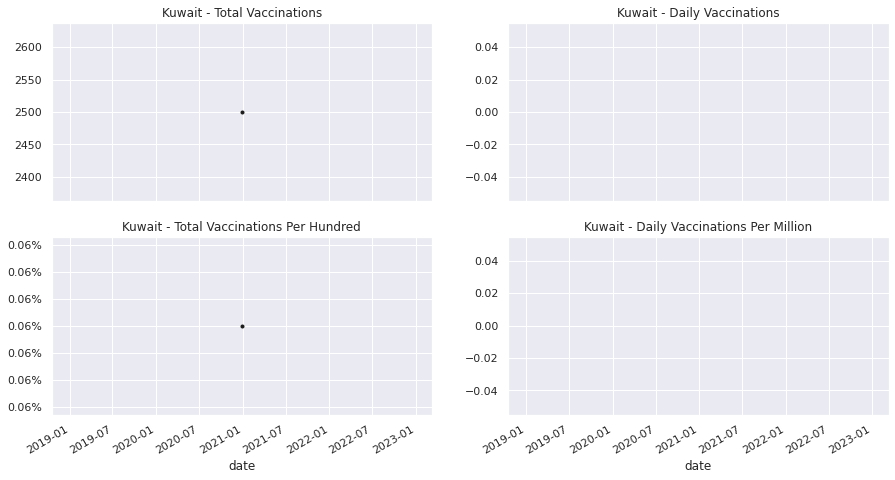

# Latvia

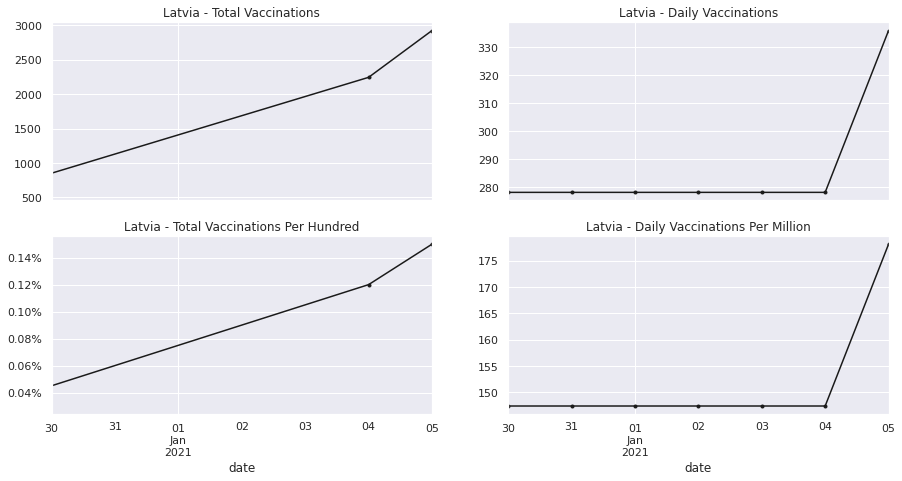

# Lithuania

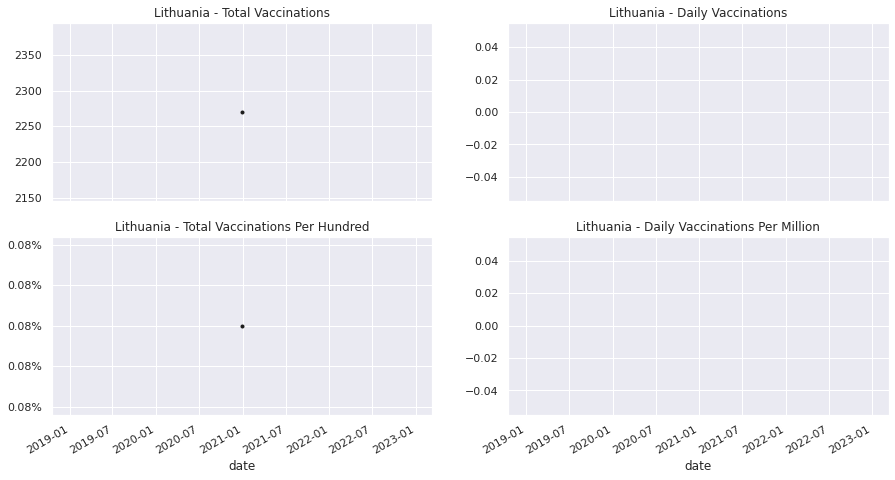

# Luxembourg

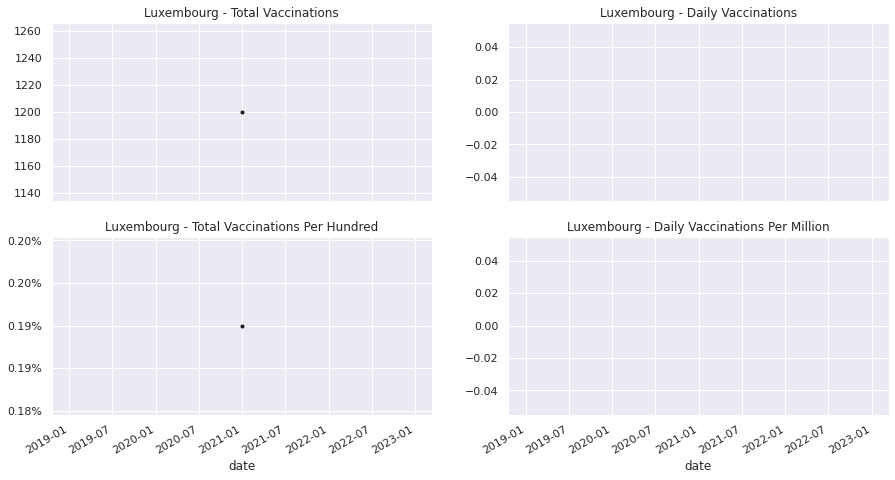

# Malta

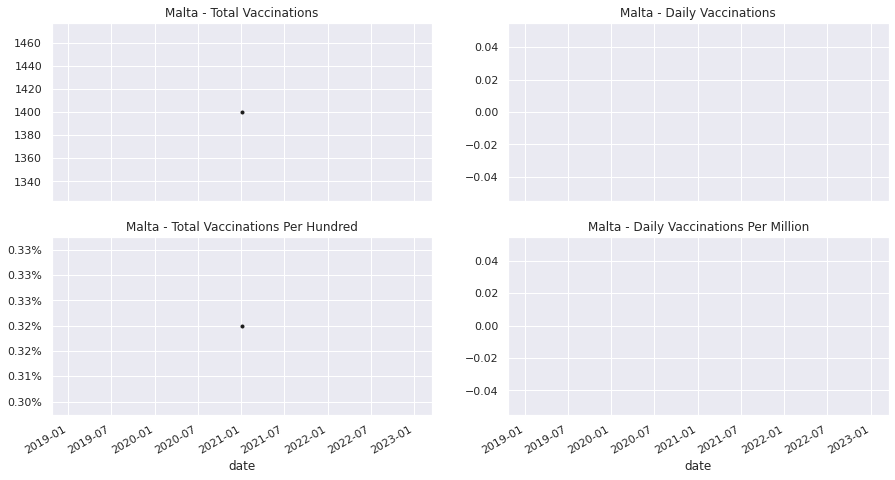

# Mexico

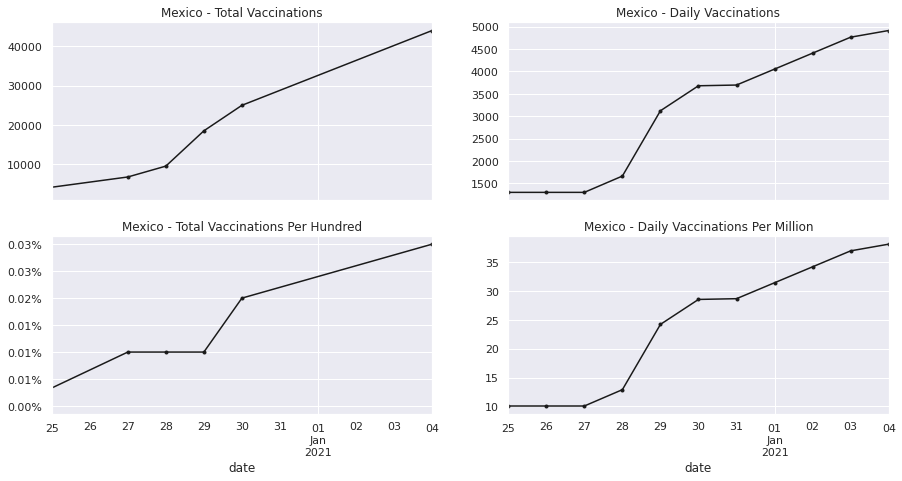

# Northern Ireland

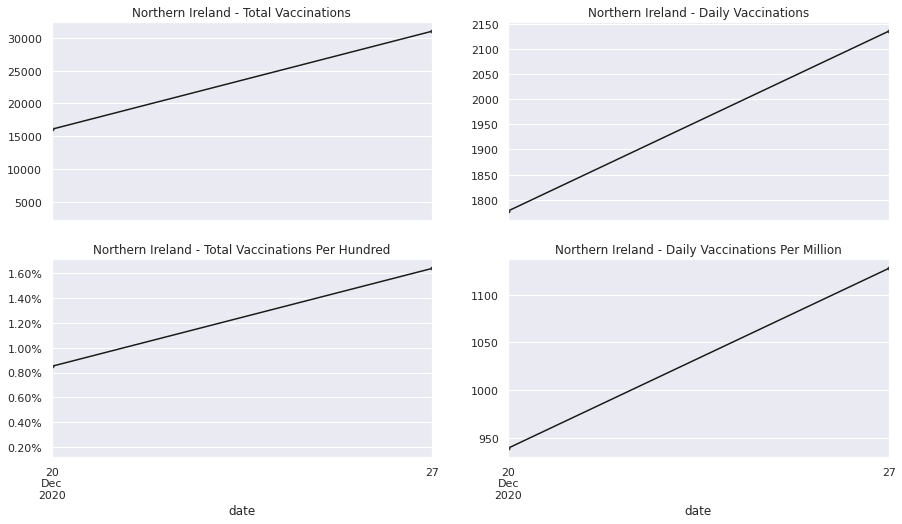

# Norway

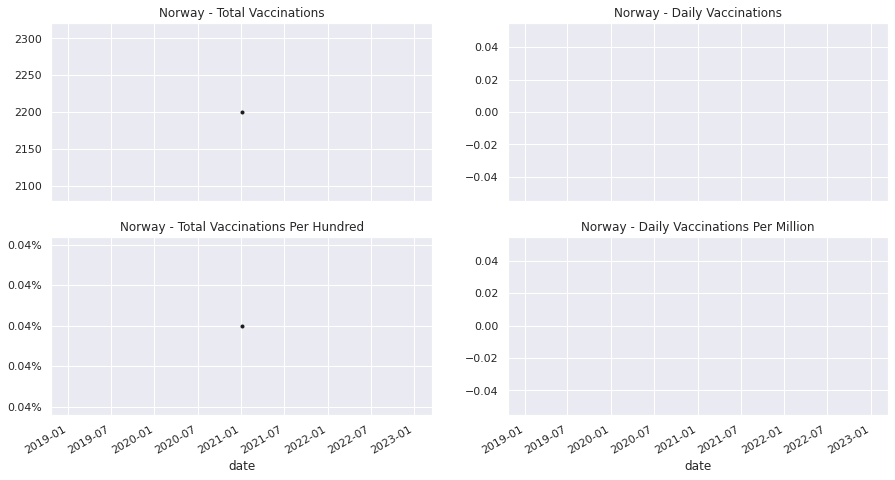

# Oman

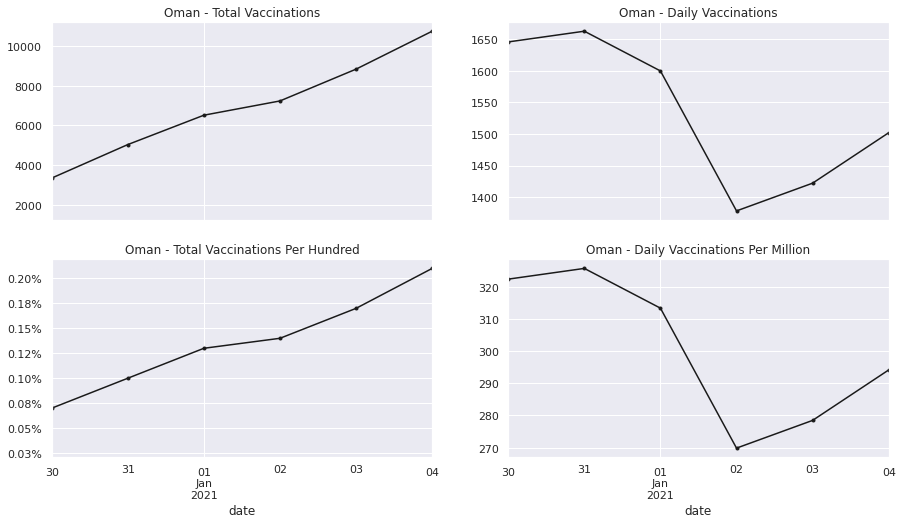

# Poland

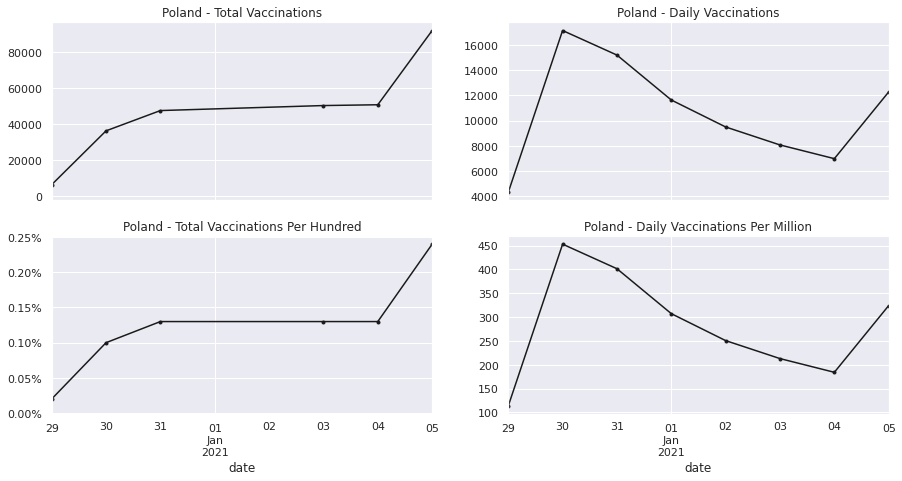

# Portugal

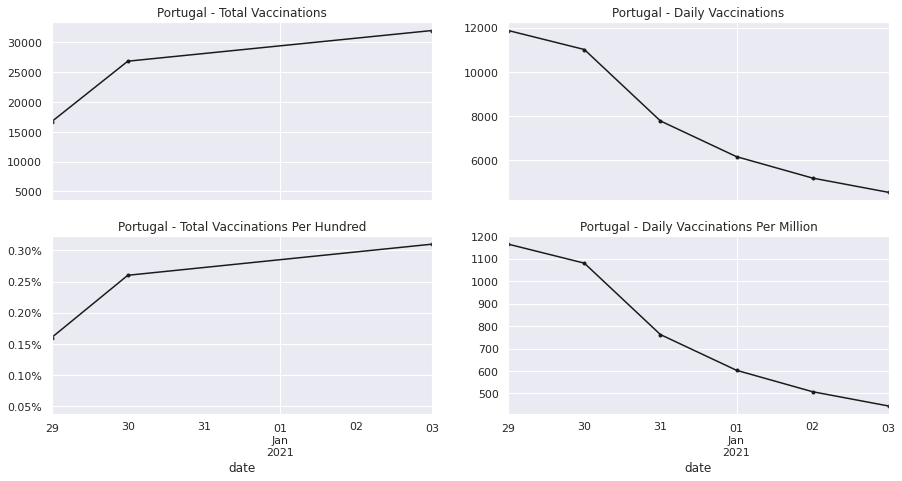

# Romania

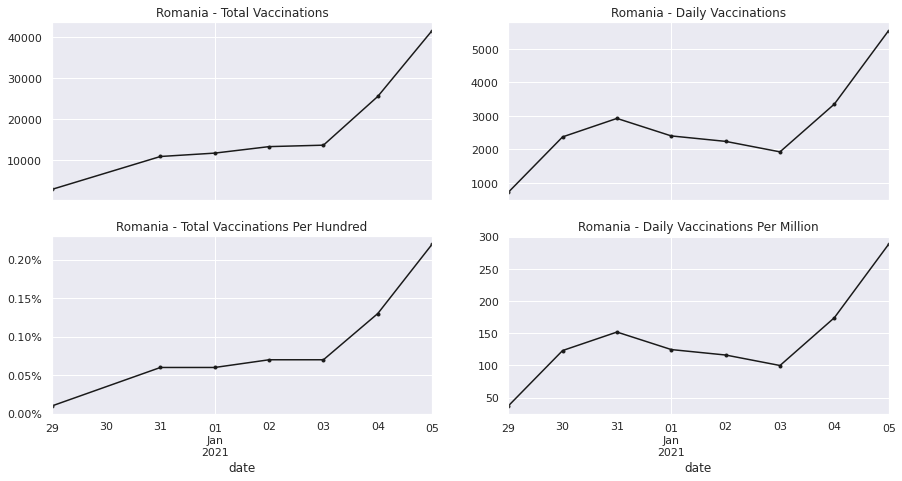

# Russia

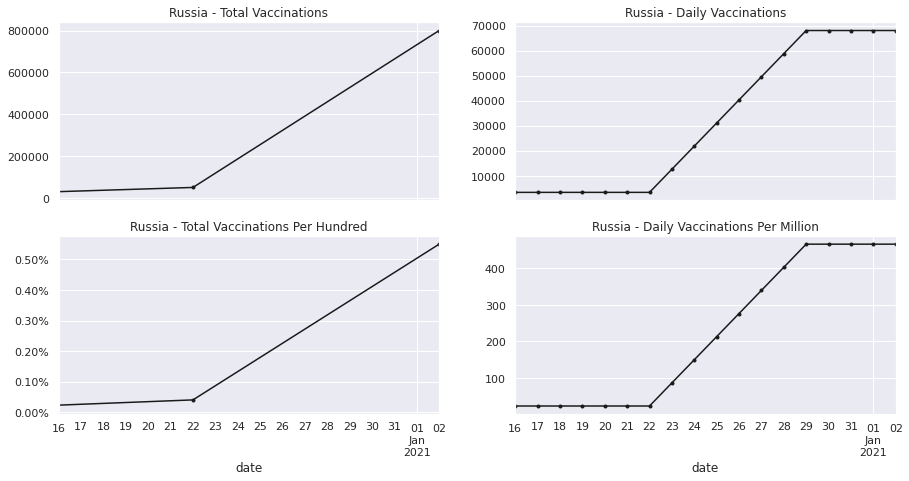

# Scotland

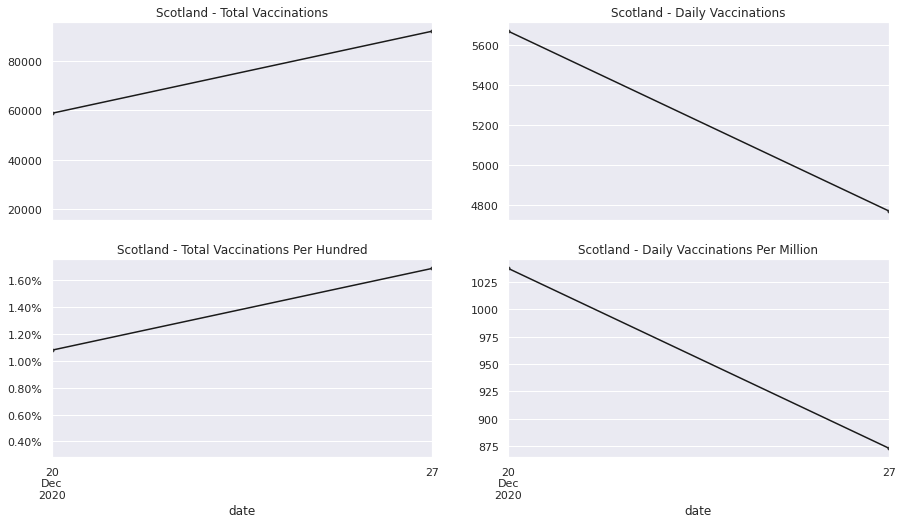

# Slovakia

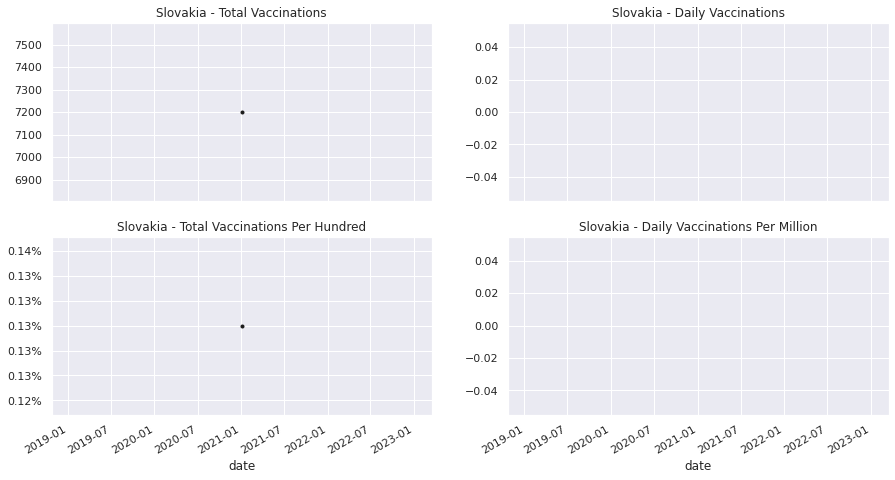

# Slovenia

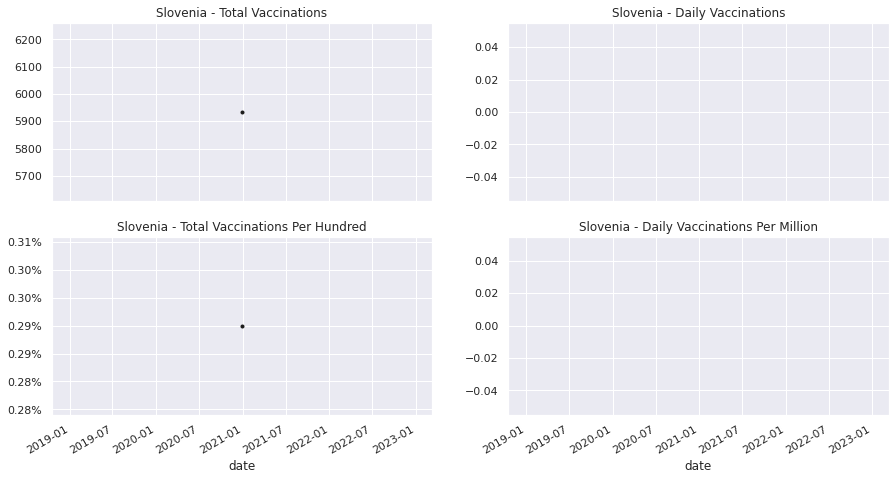

# Spain

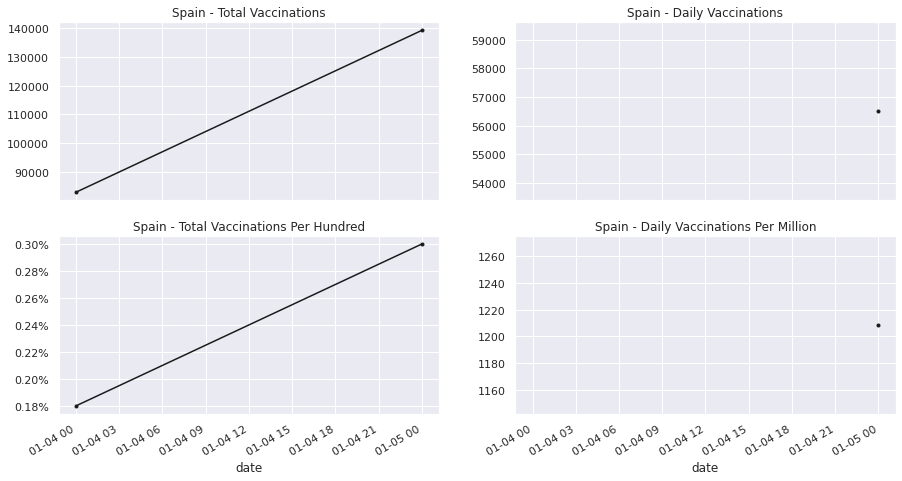

# United Arab Emirates

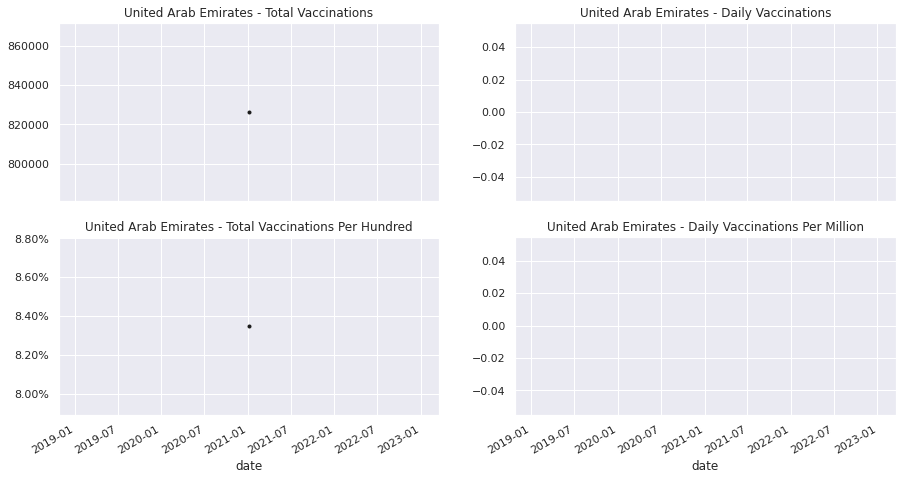

# United Kingdom

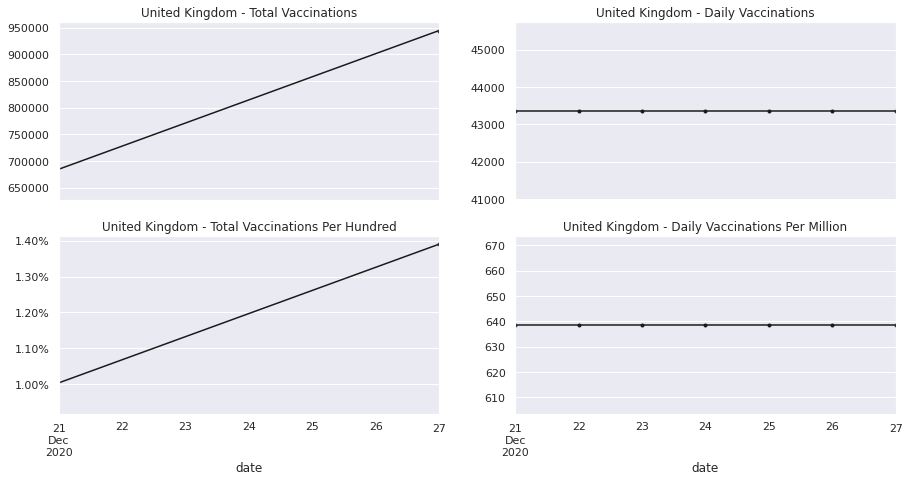

# United States

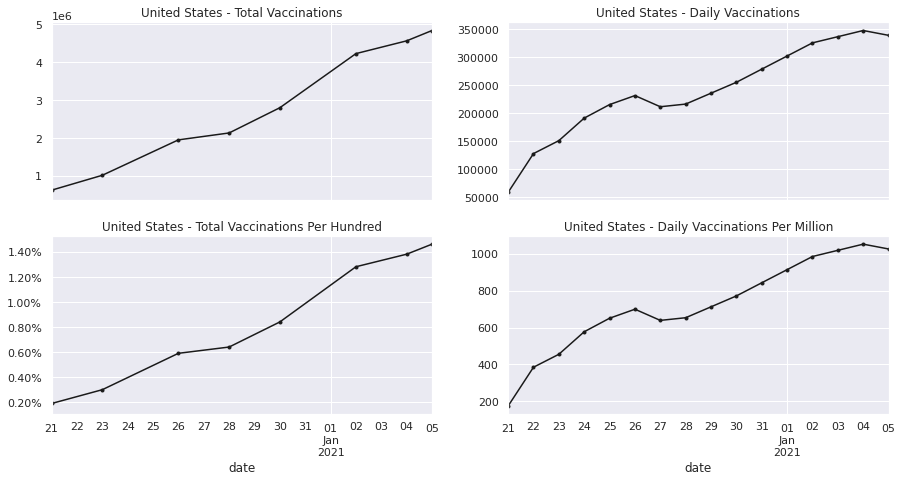

# Wales

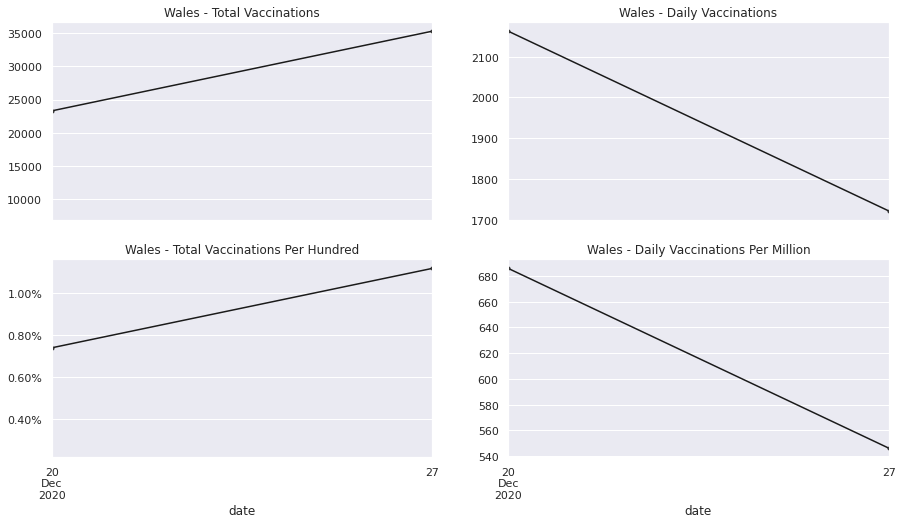

In [13]:
titles = df.columns[3:].str.replace('_', ' ').str.title()

for country in df[df.location!='World'].location.unique():
    display(Markdown(f"# {country}"))
    _df = df[df.location==country].set_index('date')
    fig, ax = plt.subplots(2, 2, figsize=(15, 8), sharex=True)
    for i, col in enumerate(df.columns[3:]):
        _df[col].dropna().plot(y=col, ax=ax.flat[i], color='k', legend=False, marker='.')
    #_df.plot(y='daily_vaccinations', ax=ax[0,1], color='k', legend=False)
    #_df.plot(y='total_vaccinations_per_hundred', ax=ax[1,0], color='k', legend=False)
    #_df.plot(y='daily_vaccinations_per_million', ax=ax[1,1], color='k', legend=False)
    for i, title in enumerate(titles):
        ax.flat[i].set(
            title=f"{country} - {title}"
        )
    ax[1,0].yaxis.set_major_formatter(mtick.PercentFormatter(100, 2))
    plt.show()